C:\Users\surya\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Accuracy: 100.00%

Confusion Matrix:
[[34  0]
 [ 0 27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        27

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



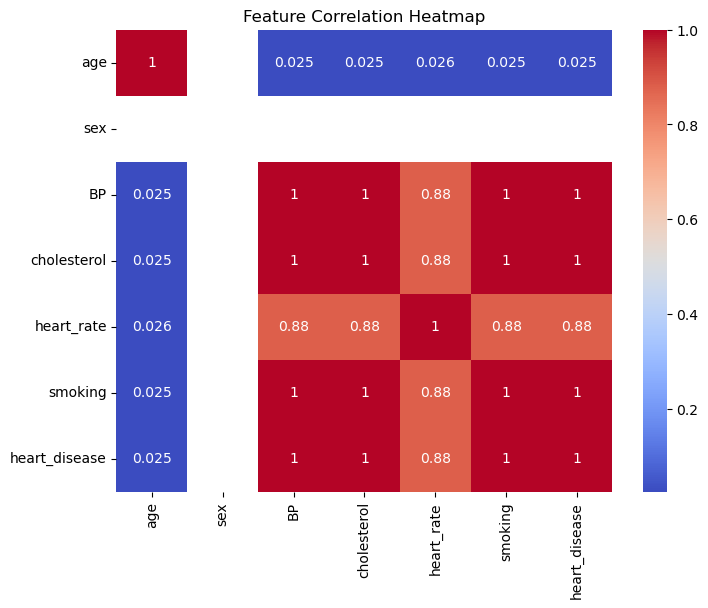

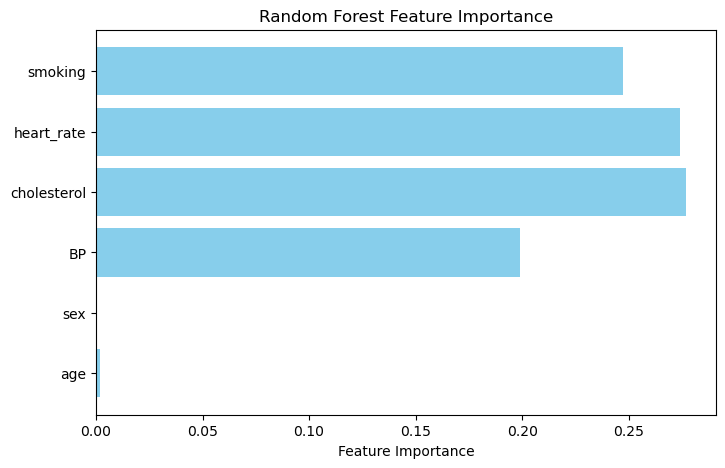

Enter age:  55
Enter sex (Male/Female):  Male
Enter blood pressure (Normal/High):  High
Enter cholesterol level (Normal/High):  Normal
Enter resting heart rate:  88
Do you smoking? (Yes/No):  Yes



Prediction and Suggestions:
 High risk of heart disease detected. Please consult a doctor immediately. Suggested: Beta-blockers, ACE inhibitors.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('Gulab_heart_disease.xlsx')

# Preprocess sex attribute
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['BP'] = data['BP'].map({'High': 1, 'Normal': 0})
data['cholesterol'] = data['cholesterol'].map({'High': 1, 'Normal': 0})
data['smoking'] = data['smoking'].map({'Yes': 1, 'No': 0})

# Define features (X) and target (y) - Add 'sex' feature
X = data[['age', 'sex', 'BP', 'cholesterol', 'heart_rate', 'smoking']]
y = data['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Function to predict heart disease based on input
def predict_heart_disease(age, sex, BP, cholesterol, heart_rate, smoking):
    sex = 1 if sex == 'Male' else 0
    BP = 1 if BP == 'High' else 0
    cholesterol = 1 if cholesterol == 'High' else 0
    smoking = 1 if smoking == 'Yes' else 0
    
    # Prepare input data for prediction
    user_data = pd.DataFrame([[age, sex, BP, cholesterol, heart_rate, smoking]], 
                             columns=['age', 'sex', 'BP', 'cholesterol', 'heart_rate', 'smoking'])
    user_data_scaled = scaler.transform(user_data)
    
    # Predict heart disease risk
    prediction = model.predict(user_data_scaled)[0]
    
    # Suggest medications based on prediction
    if prediction == 1:
        return "High risk of heart disease detected. Please consult a doctor immediately. Suggested: Beta-blockers, ACE inhibitors."
    else:
        return "Low risk of heart disease detected. Maintain a healthy lifestyle with regular exercise and a balanced diet."

# Taking input from the user
age = int(input("Enter age: "))
sex = input("Enter sex (Male/Female): ")
BP = input("Enter blood pressure (Normal/High): ")
cholestrol = input("Enter cholesterol level (Normal/High): ")
heart_rate = int(input("Enter resting heart rate: "))
smoking = input("Do you smoking? (Yes/No): ")

# Get prediction and suggestions
suggestions = predict_heart_disease(age, sex, BP, cholestrol, heart_rate, smoking)
print("\nPrediction and Suggestions:\n", suggestions)
